<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BDS/blob/main/modulo.08/Apliacaci%C3%B3n_LSTM_AMZN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

Ejemplo extraído de https://www.geeksforgeeks.org/time-series-forecasting-using-recurrent-neural-networks-rnn-in-tensorflow/

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import math

In [ ]:
#dataset of amazon stock info
data = pd.read_csv("https://raw.githubusercontent.com/cristiandarioortegayubro/BDS/main/datasets/AMZN.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,8.794500,8.974000,8.777500,8.951500,8.951500,102216000
1,2012-01-04,8.960500,9.025000,8.803500,8.875500,8.875500,84104000
2,2012-01-05,8.797000,8.912500,8.702500,8.880500,8.880500,76182000
3,2012-01-06,8.903500,9.232500,8.875000,9.130500,9.130500,140168000
4,2012-01-09,9.138000,9.218500,8.850000,8.928000,8.928000,101138000
...,...,...,...,...,...,...,...
2164,2020-08-10,158.515503,158.625504,155.076004,157.408005,157.408005,63346000
2165,2020-08-11,155.660004,157.960999,153.649994,154.033493,154.033493,74362000
2166,2020-08-12,155.399994,158.719498,155.070999,158.112000,158.112000,70442000
2167,2020-08-13,159.149506,160.876007,157.750000,158.050995,158.050995,62980000


In [ ]:
# Setting 80 percent data for training
training_data_len = math.ceil(len(data) * .8)
training_data_len
aux = data["Adj Close"]

#Splitting the dataset
train_data = pd.DataFrame(aux[:training_data_len])
test_data = pd.DataFrame(aux[training_data_len:])
print(train_data.shape, test_data.shape)

(1736, 1) (433, 1)


In [ ]:
train_data

,Adj Close
0,8.951500
1,8.875500
2,8.880500
3,9.130500
4,8.928000
...,...
1731,79.670502
1732,75.614502
1733,74.773003
1734,75.836502


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(train_data)

print(scaled_train[:5])

[[0.00166346]
 [0.00084783]
 [0.00090149]
 [0.0035845 ]
 [0.00141126]]


In [ ]:
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(test_data)
print(*scaled_test[:5])


[0.12619083] [0.12623868] [0.17744969] [0.17522752] [0.18405245]


In [ ]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= 51:
        print(X_train)
        print(y_train)
        print()

[array([0.00166346, 0.00084783, 0.00090149, 0.0035845 , 0.00141126,
       0.00182981, 0.00159371, 0.        , 0.00133614, 0.00307473,
       0.00724949, 0.00993786, 0.00804902, 0.00545187, 0.00594018,
       0.00636946, 0.0093315 , 0.01043153, 0.00870368, 0.0099325 ,
       0.0018942 , 0.00310692, 0.00630507, 0.0038689 , 0.00443233,
       0.00512455, 0.00485624, 0.00515674, 0.00840318, 0.00824757,
       0.00458258, 0.00214641, 0.00352547, 0.00339669, 0.0024952 ,
       0.00158834, 0.00171713, 0.00139516, 0.00422305, 0.00201762,
       0.00220543, 0.00180835, 0.00232348, 0.00276886, 0.00420696,
       0.0062836 , 0.00450209, 0.00400305, 0.00464697, 0.00339669])]
[0.004561113457729457]

[array([0.00166346, 0.00084783, 0.00090149, 0.0035845 , 0.00141126,
       0.00182981, 0.00159371, 0.        , 0.00133614, 0.00307473,
       0.00724949, 0.00993786, 0.00804902, 0.00545187, 0.00594018,
       0.00636946, 0.0093315 , 0.01043153, 0.00870368, 0.0099325 ,
       0.0018942 , 0.00310692, 0.0

In [ ]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
    X_test.append(scaled_test[i-50:i, 0])
    y_test.append(scaled_test[i, 0])


In [ ]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)


X_train : (1686, 50, 1) y_train : (1686, 1)


In [ ]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)


X_test : (383, 50, 1) y_test : (383, 1)


In [ ]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error


# Compararemos una RNN simple con una LSTM

In [ ]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50,activation = "tanh",return_sequences = True,input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,activation = "tanh",return_sequences = True))

regressor.add(SimpleRNN(units = 50,activation = "tanh",return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
sgd = SGD(learning_rate=0.01, momentum=0.8)
regressor.compile(optimizer = sgd,loss = "mean_squared_error")

# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 2)
regressor.summary()


Epoch 1/20
843/843 [==============================] - 37s 40ms/step - loss: 0.0134
Epoch 2/20
843/843 [==============================] - 33s 39ms/step - loss: 0.0020
Epoch 3/20
843/843 [==============================] - 35s 42ms/step - loss: 0.0014
Epoch 4/20
843/843 [==============================] - 34s 40ms/step - loss: 0.0013
Epoch 5/20
843/843 [==============================] - 32s 38ms/step - loss: 0.0011
Epoch 6/20
843/843 [==============================] - 32s 38ms/step - loss: 9.9517e-04
Epoch 7/20
843/843 [==============================] - 36s 43ms/step - loss: 9.7838e-04
Epoch 8/20
843/843 [==============================] - 34s 40ms/step - loss: 9.0364e-04
Epoch 9/20
843/843 [==============================] - 32s 38ms/step - loss: 8.4066e-04
Epoch 10/20
843/843 [==============================] - 33s 39ms/step - loss: 8.5451e-04
Epoch 11/20
843/843 [==============================] - 32s 38ms/step - loss: 7.5768e-04
Epoch 12/20
843/843 [==============================] - 40s 47

In [ ]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50, return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ["accuracy"])

#Fitting the model
regressorLSTM.fit(X_train, y_train, batch_size = 1, epochs = 12)
regressorLSTM.summary()


In [ ]:
# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)


In [ ]:
# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN)
y_LSTM_O = scaler.inverse_transform(y_LSTM)

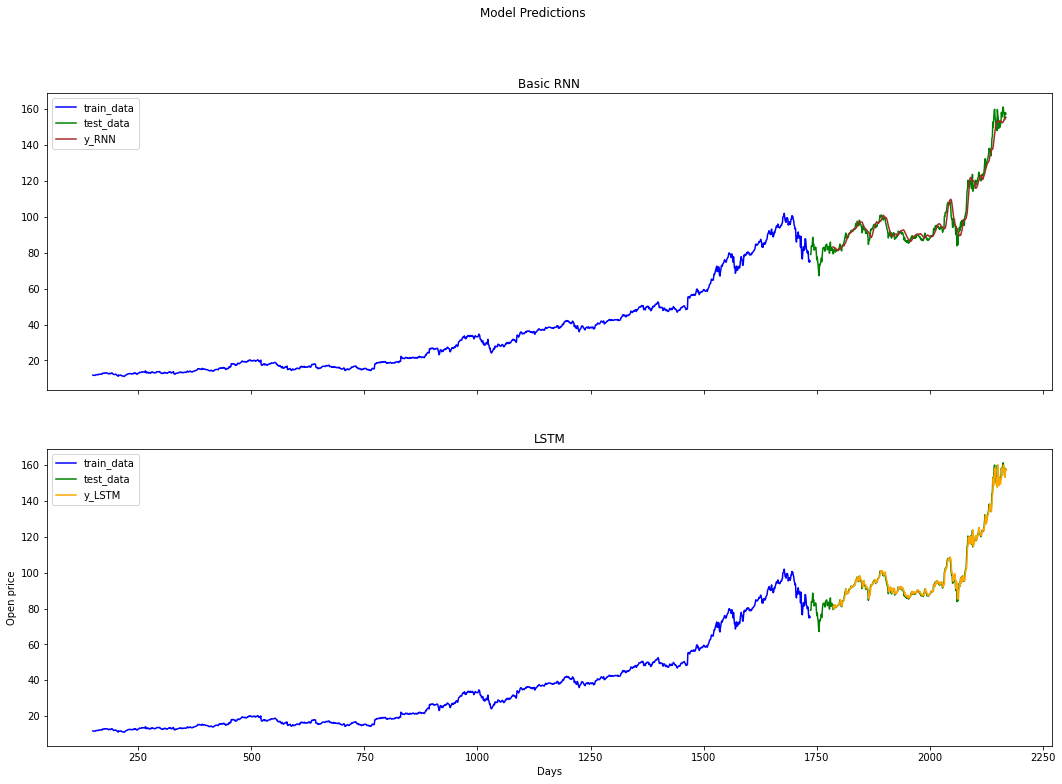

In [ ]:
fig, axs = plt.subplots(2,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for RNN predictions
axs[0].plot(train_data.index[150:], train_data[150:], label = "train_data", color = "b")
axs[0].plot(test_data.index, test_data, label = "test_data", color = "g")
axs[0].plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")

#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data[150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data, label = "test_data", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")


plt.xlabel("Days")
plt.ylabel("Open price")

plt.show()


<br>
<br>
<p align="center"><b>
💗
<font color="DeepPink">
Hemos llegado al final de nuestro colab...
</font>
</p>
<br>
<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

---